In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sys
sys.path.append('/projects/trans_scratch/validations/workspace/szong/Cervical/notebook')
from lineticks import LineTicks

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

this script squash a regular plane plot and rotate it to a squashed v-shaped plane. squash points in 90 degree into specified angle by push points toward 45 degree line

<matplotlib.axes._subplots.Floating AxesHostAxesSubplot at 0x7f92783c7b38>

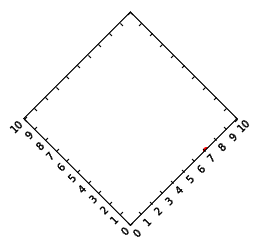

In [131]:
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes

fig = plt.figure()

plot_extents = 0, 10, 0, 10
transform = Affine2D().rotate_deg(45)
helper = floating_axes.GridHelperCurveLinear(transform, plot_extents)
ax = floating_axes.FloatingSubplot(fig, 111, grid_helper=helper)

fig.add_subplot(ax)
ax.plot(5,5, 'ro')
plt.show()

In [18]:
from matplotlib import pyplot, image
import scipy

img = scipy.misc.lena()
tr = scipy.ndimage.rotate(img,45)
imshow(tr)

AttributeError: module 'scipy' has no attribute 'misc'

TypeError: ufunc 'sqrt' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

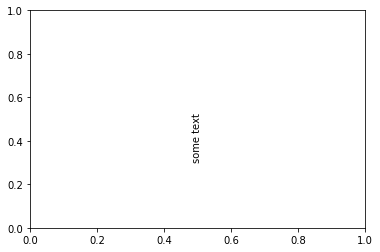

In [17]:
from matplotlib import pyplot as plt
figure = plt.figure()
ax = figure.add_subplot(111)
t = figure.text(0.5,0.5,"some text")
t.set_rotation(90)
plt.scatter(0.2,0.5, 'ro', orientation=u'vertical')
# labels = ax.get_xticklabels()
# for label in labels:
#     label.set_rotation(45)
plt.show()

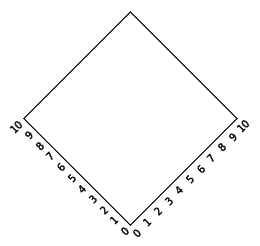

In [4]:

import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes

fig = plt.figure()

plot_extents = 0, 10, 0, 10
transform = Affine2D().rotate_deg(45)
helper = floating_axes.GridHelperCurveLinear(transform, plot_extents)
ax = floating_axes.FloatingSubplot(fig, 111, grid_helper=helper)

fig.add_subplot(ax)

# Hide the ticks and background
ax.patch.set(visible=False)
for axis in ax.axis.values():
    # If you'd like to hide the borders, use "axis.line.set(visible=False)"
    axis.major_ticks.set(visible=False)

plt.show()

,q_value_hiv+,cytoband,gene_hiv+,q_value_hiv-,gene_hiv-,hiv+q(-log10),hiv-q(-log10)
0,1.043200e-15,2q22.1,LRP1B,0.04368,LOC389033,14.981632,1.359717
1,1.519500e-09,2q36.3,AGXT,1.00000,NaN,8.818299,-0.000000
2,5.958900e-04,3p13,CHMP2B,1.00000,NaN,3.224834,-0.000000
3,1.144100e-02,3p14.2,MAP4,1.00000,NaN,1.941536,-0.000000
4,3.485300e-03,4q21.3,MAPK10,1.00000,NaN,2.457760,-0.000000


(0, 16)

(-8.0, 8.0)

xxx 10    0.500000
8     1.116734
7     1.394842
9     3.006704
14    3.086953
18    3.369964
6     3.809815
3     4.391307
15    5.053517
12    5.144581
4     5.939979
Name: hiv+q(-log10), dtype: float64


/projects/da_workspace/software/miniconda/envs/dlpy3/lib/python3.6/site-packages/ipykernel_launcher.py:59: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/projects/da_workspace/software/miniconda/envs/dlpy3/lib/python3.6/site-packages/ipykernel_launcher.py:105: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
/projects/da_workspace/software/miniconda/envs/dlpy3/lib/python3.6/site-packages/ipykernel_launcher.py:106: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


/projects/da_workspace/software/miniconda/envs/dlpy3/lib/python3.6/site-packages/ipykernel_launcher.py:149: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
/projects/da_workspace/software/miniconda/envs/dlpy3/lib/python3.6/site-packages/ipykernel_launcher.py:150: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.


Text(0.5,1,'del_cytoband_qvalue_comparison_hiv_pos_vs_neg')

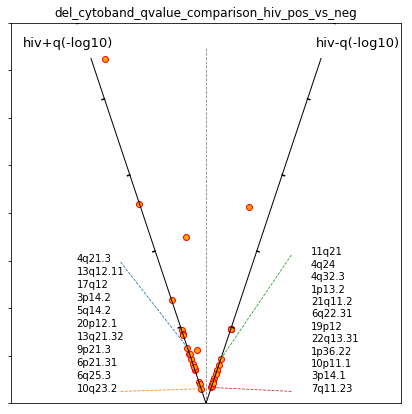

In [40]:
# constants
v_angle = 18
y_heigth = 16
tk_length = .1
squash_factor = v_angle/45.0
fig_heigth = 7

# gistic cytoband data
cnvdir = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/'
of = f'{cnvdir}del_cytoband_qvalue_comparison_hiv_pos_vs_neg.csv'
# ndf.to_csv(of, index=False)
ndf = pd.read_csv(of)
ndf.head()
x = ndf['hiv-q(-log10)']
y = ndf['hiv+q(-log10)']


# v plot setup
# sns.set_style('white')
f, ax = plt.subplots(figsize=(fig_heigth, fig_heigth))



point_dists = np.sqrt(x**2 + y**2)
angles_before = np.degrees(np.arcsin( y/point_dists))
angles_after = (90 - v_angle) + angles_before * squash_factor

# new coordinates in squashed and rotated plane
xc = point_dists*np.cos(np.radians(angles_after))
yc = point_dists*np.sin(np.radians(angles_after))

# plt.scatter(x, y)

# plot 45o angle line where both axes will be squashed toward
ax.vlines(0, 0, y_heigth-1, 'gray', linestyles='dashed', lw=.8)
plt.ylim(0, y_heigth)
plt.xlim(-y_heigth/2, y_heigth/2)
plt.scatter(xc, yc, c='orange', edgecolors='red')

# x axis
xlinexs = np.linspace(0, y_heigth, y_heigth) 
xlineys = xlinexs/np.tan(np.radians(v_angle))

# y axis
ylinexs = -np.linspace(0, y_heigth, y_heigth) 
# ylineys = xlinexs/np.tan(np.radians(90 + v_angle))

# figure out tick coordinates of tip and end
# xs, = ax.plot(xlinexs, xlineys, c='black', lw=1)
# ys, = ax.plot(ylinexs, xlineys, c='black', lw=1)
# y_heigth*np.tan(np.radians(v_angle))
axis_offset = 1.5
xs, = ax.plot((0, (y_heigth-axis_offset)*np.tan(np.radians(v_angle))), (0, y_heigth-axis_offset), c='black', lw=1)
ys, = ax.plot((0, -(y_heigth-axis_offset)*np.tan(np.radians(v_angle))), (0, y_heigth-axis_offset), c='black', lw=1)


# plot ticks
xax_length = y_heigth/np.cos(np.radians(v_angle))
tks = np.linspace(0, xax_length, int(y_heigth)/3+1)
xts1 = tks*np.cos(np.radians(90-v_angle))
yts1 = tks*np.sin(np.radians(90-v_angle))
xts2 = xts1 + tk_length*np.cos(np.radians(v_angle))
yts2 = yts1 - tk_length*np.sin(np.radians(v_angle))


# pot x and y axis ticks
_ = ax.plot((xts1, xts2), (yts1, yts2), color='black')
_ = ax.plot((-xts1, -xts2), (yts1, yts2), color='black')

# add text annotations
hivpos = ndf[(ndf['hiv-q(-log10)']==0)&(ndf['hiv+q(-log10)']<3)].sort_values('hiv+q(-log10)', ascending=True)
hivpos_bands = hivpos['cytoband'].tolist()
hivpos_qs = hivpos['hiv+q(-log10)']
# nbands = len(hivpos_bands)
# anno_ys = np.linspace(1, 10, nbands)
# anno_xs = np.array([-6]*nbands)
# for i, lb in enumerate(hivpos_bands):
#     _ = ax.text(anno_xs[i], anno_ys[i], lb)

# draw vertical line to annotate the low q values which are squished together, let labels spread evenly
mfactor = 3
xoffset =0.5
mhivpos_qs = hivpos_qs * mfactor
vl_min = min(mhivpos_qs)
vl_max = max(mhivpos_qs)
mhivpos_qs = mhivpos_qs - vl_min + xoffset
print('xxx', mhivpos_qs)
mhivpos_qs =  np.linspace(xoffset, vl_max- vl_min + xoffset, len(mhivpos_qs))
# get top and bottom annotation coordinates
top_anno = mhivpos_qs[mhivpos_qs.argmax()]
bottom_anno = mhivpos_qs[mhivpos_qs.argmin()]

anno_xs = np.array([-5.3]*len(hivpos_qs))
anno_ys = np.array(mhivpos_qs)
    
# ax.vlines(-5, 1, vl_max- vl_min + 1)
# ax.scatter([-5]*len(hivpos_qs), mhivpos_qs,  c='orange', edgecolors='red')
for i, lb in enumerate(hivpos_bands):
    _ = ax.text(anno_xs[i], anno_ys[i], lb)
 

# draw a line to connect annotations and points
dfpos = pd.DataFrame({'x':xc, 'y':yc})
df_sub = dfpos[(dfpos.x <0)&(dfpos.y<2.5)].sort_values('x')
top_point = df_sub.loc[df_sub.x.argmin(), :]
bottom_point = df_sub.loc[df_sub.x.argmax(),:]
plt.plot((-3.5,top_point[0]),(top_anno, top_point[1]), linestyle='--', lw=.8)
plt.plot((-3.5,bottom_point[0]),(bottom_anno, bottom_point[1]), linestyle='--', lw=.8)


hivneg = ndf[(ndf['hiv+q(-log10)']==0)&(ndf['hiv-q(-log10)']<3)].sort_values('hiv-q(-log10)', ascending=True)    
hivneg_bands = hivneg['cytoband'].tolist()
hivneg_qs = hivneg['hiv-q(-log10)']
# nbands = len(hivneg_bands)
# anno_ys = np.linspace(1, 10, nbands)
# anno_xs = np.array([4]*nbands)
# for i, lb in enumerate(hivneg_bands):
#     _ = ax.text(anno_xs[i], anno_ys[i], lb)
    
# draw dottedline to annotations
# ax.plot(())
# print(anno_xs, anno_ys)
# xc
# yc

# draw vertical line
# mfactor = 5
# xoffset = 1
mhivneg_qs = hivneg_qs * mfactor
vl_min = min(mhivneg_qs)
vl_max = max(mhivneg_qs)
mhivneg_qs = mhivneg_qs - vl_min + 1
mhivneg_qs =  np.linspace(xoffset, vl_max- vl_min + xoffset+2, len(mhivneg_qs))
# get top and bottom annotation coordinates
top_anno = mhivneg_qs[mhivneg_qs.argmax()]
bottom_anno = mhivneg_qs[mhivneg_qs.argmin()] 
anno_xs = np.array([4.3]*len(hivneg_qs))
anno_ys = np.array(mhivneg_qs)
  
# ax.vlines(5, 1, vl_max- vl_min + 1)
# ax.scatter([5]*len(hivneg_qs), mhivneg_qs,  c='orange', edgecolors='red')
for i, lb in enumerate(hivneg_bands):
    _ = ax.text(anno_xs[i], anno_ys[i], lb)

    
# draw a line to connect annotations and points
dfneg = pd.DataFrame({'x':xc, 'y':yc})
df_sub = dfneg[(dfneg.x >0)&(dfneg.y<2.5)].sort_values('x')
top_point = df_sub.loc[df_sub.x.argmax(), :]
bottom_point = df_sub.loc[df_sub.x.argmin(),:]
plt.plot((3.5,top_point[0]),(top_anno, top_point[1]), linestyle='--', lw=.8)
plt.plot((3.5,bottom_point[0]),(bottom_anno, bottom_point[1]), linestyle='--', lw=.8)
    

# x y axis lables
_ = ax.text(4.5, 15, 'hiv-q(-log10)', fontsize=13)
_ = ax.text(-7.5, 15, 'hiv+q(-log10)', fontsize=13)


ax.set_title('del_cytoband_qvalue_comparison_hiv_pos_vs_neg')

# # remove ticks and ticklabels
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    labelleft=False) # labels along the bottom edge are off

of = f'{cnvdir}del_cytoband_qvalue_comparison_hiv_pos_vs_neg_vplot.png'
plt.savefig(of, bbox_inches='tight', dpi=200)
plt.show()

In [13]:
# yc[yc <1.3]
dfpos = pd.DataFrame({'x':xc, 'y':yc})
df_sub = dfpos[(dfpos.x <0)&(dfpos.y<2.5)].sort_values('x')
left_point = df_sub.loc[df_sub.x.argmax(), :]
right_point = df_sub.loc[df_sub.x.argmin(),:]
df_sub

/projects/da_workspace/software/miniconda/envs/dlpy3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  after removing the cwd from sys.path.


x   -0.199141
y    0.612893
Name: 10, dtype: float64

/projects/da_workspace/software/miniconda/envs/dlpy3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  """


x   -0.759490
y    2.337469
Name: 4, dtype: float64

,x,y
4,-0.759490,2.337469
12,-0.677559,2.085313
15,-0.668179,2.056444
3,-0.599968,1.846510
6,-0.540071,1.662167
18,-0.494763,1.522725
14,-0.465612,1.433005
9,-0.457346,1.407565
16,-0.369040,2.259058
7,-0.291315,0.896575


In [4]:
ndf[ndf['hiv+q(-log10)']==0].sort_values('hiv-q(-log10)', ascending=True)

,q_value_hiv+,cytoband,gene_hiv+,q_value_hiv-,gene_hiv-,hiv+q(-log10),hiv-q(-log10)
28,1.0,7q11.23,NaN,0.199190,FLJ35390,-0.0,0.700732
23,1.0,3p14.1,NaN,0.170100,PXK,-0.0,0.769296
29,1.0,10p11.1,NaN,0.170100,ZNF33B,-0.0,0.769296
21,1.0,1p36.22,NaN,0.141170,PRKCZ,-0.0,0.850258
35,1.0,22q13.31,NaN,0.132270,DNAJB7,-0.0,0.878539
33,1.0,19p12,NaN,0.108150,EPHX3,-0.0,0.965973
27,1.0,6q22.31,NaN,0.076578,C6orf170,-0.0,1.115896
34,1.0,21q11.2,NaN,0.048570,TPTE,-0.0,1.313632
20,1.0,1p13.2,NaN,0.036117,MAGI3,-0.0,1.442288
26,1.0,4q32.3,NaN,0.034063,GUCY1A3,-0.0,1.467717


In [6]:
ndf[ndf['hiv-q(-log10)']==0].sort_values('hiv+q(-log10)', ascending=False)

,q_value_hiv+,cytoband,gene_hiv+,q_value_hiv-,gene_hiv-,hiv+q(-log10),hiv-q(-log10)
1,1.519500e-09,2q36.3,AGXT,1.0,NaN,8.818299,-0.0
5,2.792400e-05,4q35.2,F11,1.0,NaN,4.554022,-0.0
2,5.958900e-04,3p13,CHMP2B,1.0,NaN,3.224834,-0.0
11,8.401800e-04,11q24.3,TTC36,1.0,NaN,3.075628,-0.0
13,9.411400e-04,13q14.2,LOC100616668,1.0,NaN,3.026346,-0.0
4,3.485300e-03,4q21.3,MAPK10,1.0,NaN,2.457760,-0.0
12,6.417600e-03,13q12.11,LOC100616668,1.0,NaN,2.192627,-0.0
15,6.882200e-03,17q12,BRIP1,1.0,NaN,2.162273,-0.0
3,1.144100e-02,3p14.2,MAP4,1.0,NaN,1.941536,-0.0
6,1.787700e-02,5q14.2,ATP6AP1L,1.0,NaN,1.747705,-0.0


Text(4,1,'2q36.3')

Text(4,1.6,'4q35.2')

Text(4,2.2,'3p13')

Text(4,2.8,'11q24.3')

Text(4,3.4,'13q14.2')

Text(4,4,'4q21.3')

Text(4,4.6,'13q12.11')

Text(4,5.2,'17q12')

Text(4,5.8,'3p14.2')

Text(4,6.4,'5q14.2')

Text(4,7,'20p12.1')

Text(4,7.6,'13q21.32')

Text(4,8.2,'9p21.3')

Text(4,8.8,'6p21.31')

Text(4,9.4,'6q25.3')

Text(4,10,'10q23.2')

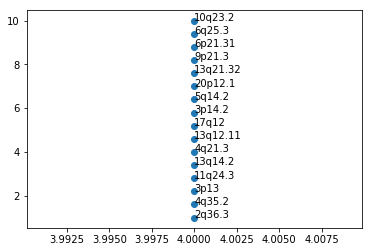

In [7]:
fig, ax = plt.subplots()
hivneg_bands = ndf[ndf['hiv-q(-log10)']==0].sort_values('hiv+q(-log10)', ascending=False)['cytoband'].tolist()
nbands = len(hivneg_bands)
anno_ys = np.linspace(1, 10, nbands)
anno_xs = np.array([4]*nbands)
for i, lb in enumerate(hivneg_bands):
    ax.text(anno_xs[i], anno_ys[i], lb)
ax.scatter(anno_xs, anno_ys)
plt.show()

,q_value_hiv+,cytoband,gene_hiv+,q_value_hiv-,gene_hiv-,hiv+q(-log10),hiv-q(-log10)
0,1.043200e-15,2q22.1,LRP1B,0.04368,LOC389033,14.981632,1.359717
1,1.519500e-09,2q36.3,AGXT,1.00000,NaN,8.818299,-0.000000
2,5.958900e-04,3p13,CHMP2B,1.00000,NaN,3.224834,-0.000000
3,1.144100e-02,3p14.2,MAP4,1.00000,NaN,1.941536,-0.000000
4,3.485300e-03,4q21.3,MAPK10,1.00000,NaN,2.457760,-0.000000


Text(0.5,0,'HIV-(-log10)')

Text(0,0.5,'HIV+(-log10)')

Text(0.5,1,'GISTIC dels cytobands')

(-1, 16)

(-1, 16)

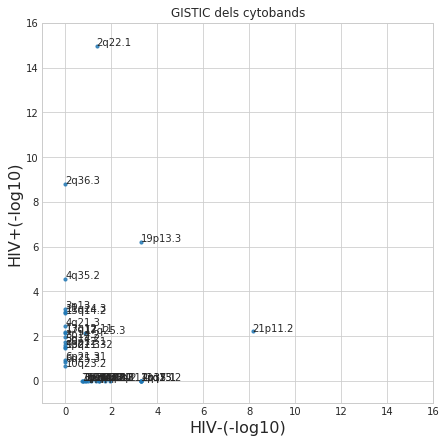

In [8]:
cnvdir = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/'
of = f'{cnvdir}gistic_cytobands_hiv_pos_vs_neg.csv'
# ndf.to_csv(of, index=False)
ndf = pd.read_csv(of)
ndf.head()
x = ndf['hiv-q(-log10)']
y = ndf['hiv+q(-log10)']
# Set theme
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(7, 7))
sns.regplot(x='hiv-q(-log10)', y='hiv+q(-log10)', data=ndf, ax=ax, fit_reg=False,  scatter_kws={"s": 10})#x_jitter=1e-12, y_jitter=1e-10,
ax.set_xlabel('HIV-(-log10)', fontsize=16)
ax.set_ylabel('HIV+(-log10)', fontsize=16)
ax.set_title('GISTIC dels cytobands')
ax.set_xlim(-1, 16)
ax.set_ylim(-1, 16)

texts = [plt.text(a, b, c) for a, b, c in zip(ndf['hiv-q(-log10)'], ndf['hiv+q(-log10)'], ndf.cytoband)]
# adjust_text(texts)

# of = f'{root}del_cytoband_qvalue_comparison_hiv_pos_vs_neg.png'
# plt.savefig(of, bbox_inches='tight', dpi=200)

xxx 0


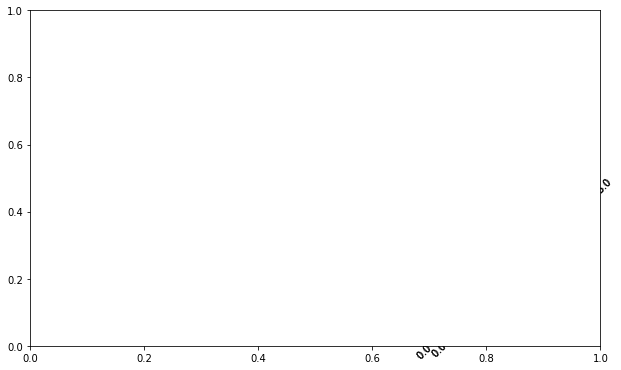

In [22]:
import numpy as np
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
import matplotlib.pyplot as plt

fig  = plt.figure(1, figsize=(8, 8))

axisOrientation = 45
axisScale = [1,1]
axisPosition = 222
axisLimits = (0,5, 0, 5)
print('xxx', axisLimits[0])
doShift = [True]
axes = []
label_axes = []
i = 0
tr_rot = Affine2D().scale(1,1).rotate_deg(45)
tr_trn = Affine2D().translate(-90,-5)
tr = tr_rot + tr_trn
grid_helper = floating_axes.GridHelperCurveLinear(tr, extremes=axisLimits)

ax = floating_axes.FloatingSubplot(fig, 222, grid_helper=grid_helper)

fig.add_subplot(ax)
aux_ax = ax.get_aux_axes(tr)


axes.append(aux_ax)
label_axes.append(ax)


x = np.random.randint(1,5,10)
y = np.random.randint(1,5,10)
axes[0].scatter(np.array(x), np.array(y))
axes[0].scatter(x=3.5, y=4, marker='^', c='red')
axes[0].text(3,4,'xxxx', rotation=45)
ax.axis['left'].label.set_text('left')
ax.axis['bottom'].label.set_text('bottom')


# add a subplot
ax2 = fig.add_subplot(211)



fig.subplots_adjust(wspace=-0.30, hspace=-0.30, left=0.00, right=0.99, top=0.99, bottom=0.0)
plt.show()

In [121]:
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
import numpy as np
import mpl_toolkits.axisartist.angle_helper as angle_helper
from matplotlib.projections import PolarAxes
from mpl_toolkits.axisartist.grid_finder import (FixedLocator, MaxNLocator,
                                                 DictFormatter)
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


def setup_axes1(fig, rect):
    """
    A simple one.
    """
    tr = Affine2D().scale(2, 1).rotate_deg(30)

    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(-0.5, 3.5, 0, 4))

    ax1 = floating_axes.FloatingSubplot(fig, rect, grid_helper=grid_helper)
    fig.add_subplot(ax1)

    aux_ax = ax1.get_aux_axes(tr)

    grid_helper.grid_finder.grid_locator1._nbins = 4
    grid_helper.grid_finder.grid_locator2._nbins = 4

    return ax1, aux_ax


def setup_axes2(fig, rect):
    """
    With custom locator and formatter.
    Note that the extreme values are swapped.
    """
    tr = PolarAxes.PolarTransform()

    pi = np.pi
    angle_ticks = [(0, r"$0$"),
                   (.25*pi, r"$\frac{1}{4}\pi$"),
                   (.5*pi, r"$\frac{1}{2}\pi$")]
    grid_locator1 = FixedLocator([v for v, s in angle_ticks])
    tick_formatter1 = DictFormatter(dict(angle_ticks))

    grid_locator2 = MaxNLocator(2)

    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(.5*pi, 0, 2, 1),
        grid_locator1=grid_locator1,
        grid_locator2=grid_locator2,
        tick_formatter1=tick_formatter1,
        tick_formatter2=None)

    ax1 = floating_axes.FloatingSubplot(fig, rect, grid_helper=grid_helper)
    fig.add_subplot(ax1)

    # create a parasite axes whose transData in RA, cz
    aux_ax = ax1.get_aux_axes(tr)

    aux_ax.patch = ax1.patch  # for aux_ax to have a clip path as in ax
    ax1.patch.zorder = 0.9  # but this has a side effect that the patch is
    # drawn twice, and possibly over some other
    # artists. So, we decrease the zorder a bit to
    # prevent this.

    return ax1, aux_ax
def setup_axes3(fig, rect):
    """
    Sometimes, things like axis_direction need to be adjusted.
    """

    # rotate a bit for better orientation
    tr_rotate = Affine2D().translate(-65, 0)

    # scale degree to radians
    tr_scale = Affine2D().scale(np.pi/180., 1.)

    tr = tr_rotate + tr_scale + PolarAxes.PolarTransform()

    grid_locator1 = angle_helper.LocatorHMS(4)
    tick_formatter1 = angle_helper.FormatterHMS()

    grid_locator2 = MaxNLocator(3)

    # Specify theta limits in degrees
    ra0, ra1 = 8.*15, 14.*15
    # Specify radial limits
    cz0, cz1 = 0, 10
    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(ra0, ra1, cz0, cz1),
        grid_locator1=grid_locator1,
        grid_locator2=grid_locator2,
        tick_formatter1=tick_formatter1,
        tick_formatter2=None)

    ax1 = floating_axes.FloatingSubplot(fig, rect, grid_helper=grid_helper)
    fig.add_subplot(ax1)

    # adjust axis
    ax1.axis["left"].set_axis_direction("bottom")
    ax1.axis["right"].set_axis_direction("top")

    ax1.axis["bottom"].set_visible(True)
    ax1.axis["top"].set_axis_direction("bottom")
    ax1.axis["top"].toggle(ticklabels=True, label=True)
    ax1.axis["top"].major_ticklabels.set_axis_direction("top")
    ax1.axis["top"].label.set_axis_direction("top")

    ax1.axis["left"].label.set_text(r"cz [km$^{-1}$]")
    ax1.axis["top"].label.set_text(r"$\alpha_{1950}$")

    # create a parasite axes whose transData in RA, cz
    aux_ax = ax1.get_aux_axes(tr)

    aux_ax.patch = ax1.patch  # for aux_ax to have a clip path as in ax
    ax1.patch.zorder = 0.9  # but this has a side effect that the patch is
    # drawn twice, and possibly over some other
    # artists. So, we decrease the zorder a bit to
    # prevent this.

    return ax1, aux_ax

[56.67455225 97.77853328 70.6334846 ]
[183.03305735 186.84757285 183.83520096]


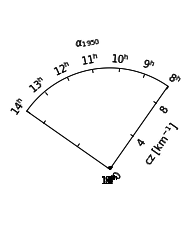

In [122]:
fig = plt.figure(1, figsize=(8, 4))
fig.subplots_adjust(wspace=0.3, left=0.05, right=0.95)

# ax1, aux_ax1 = setup_axes1(fig, 131)
# aux_ax1.bar([0, 1, 2, 3], [3, 2, 1, 3])

# ax2, aux_ax2 = setup_axes2(fig, 132)
# theta = np.random.rand(10)*.5*np.pi
# radius = np.random.rand(10) + 1.
# aux_ax2.scatter(theta, radius)

ax3, aux_ax3 = setup_axes3(fig, 133)

theta = (8 + np.random.rand(3)*(14 - 8))*15.  # in degrees
radius = np.random.rand(3)*100.
print(radius)
print(theta)
aux_ax3.scatter(theta, radius)

plt.show()

0
1
2
3


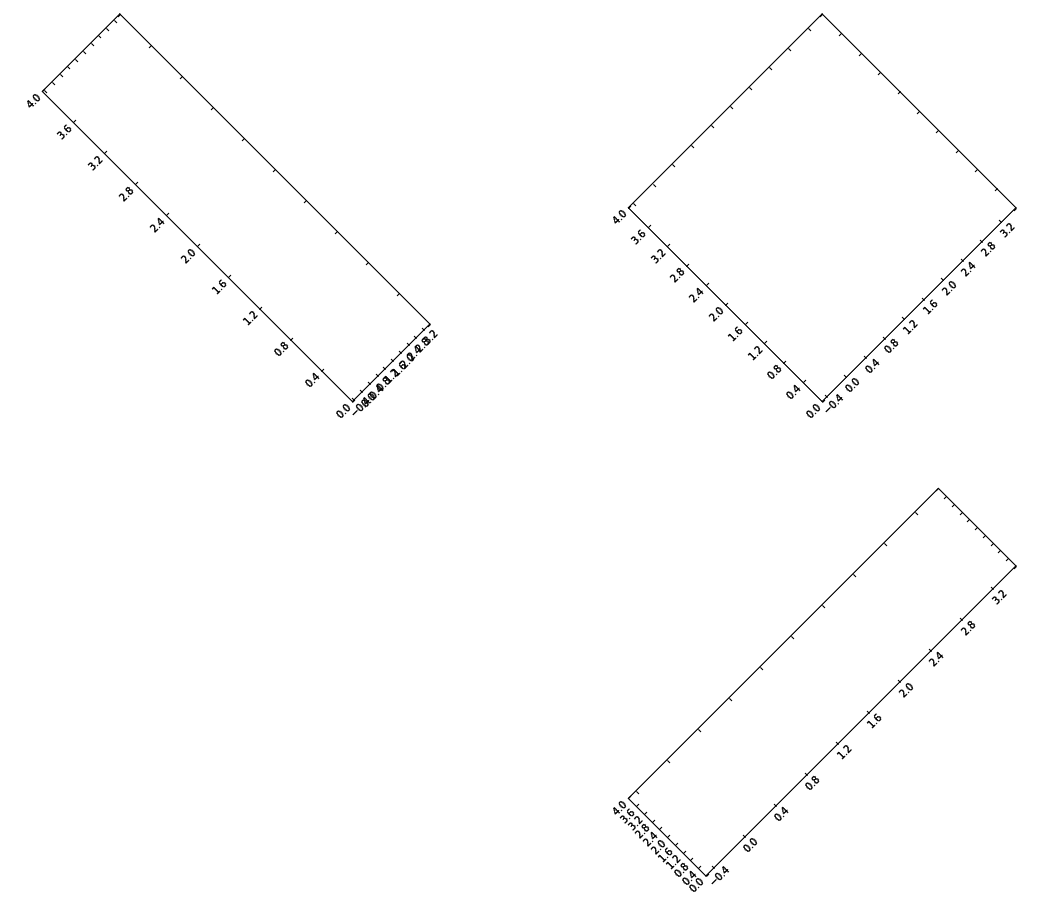

In [46]:
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
import matplotlib.pyplot as plt

def setup_axes(fig, rect, rotation, axisScale):
    tr = Affine2D().scale(axisScale[0], axisScale[1]).rotate_deg(rotation)

    grid_helper = floating_axes.GridHelperCurveLinear(tr, extremes=(-0.5, 3.5, 0, 4))

    ax = floating_axes.FloatingSubplot(fig, rect, grid_helper=grid_helper)
    fig.add_subplot(ax)
    aux_ax = ax.get_aux_axes(tr)

    return ax, aux_ax

fig  = plt.figure(1, figsize=(16, 16))
fig.subplots_adjust(wspace=0.3, left=0.05, right=0.95)

axes = []
axisOrientation = [45, 45, 0, 45]
axisScale = [[1,4],[4,4],[.1,.1],[4,1]]
axisPosition = [221,222,223,224]

for i in range(0, len(axisOrientation)):
    print(i)
    if i != 2:
        ax, aux_ax = setup_axes(fig, axisPosition[i], axisOrientation[i], axisScale[i])        
        axes.append(aux_ax)
# fig.subplots_adjust(wspace=0.02, hspace=0.02, left=0.00, right=0.9, top=0.9, bottom=0.0)
plt.show()

### new plot 20190329

In [86]:
# gistic cytoband data
cnvdir = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/'
of = f'{cnvdir}del_cytoband_qvalue_comparison_hiv_pos_vs_neg.csv'
# ndf.to_csv(of, index=False)
ndf = pd.read_csv(of)
ndf.head()
x = ndf['hiv-q(-log10)']
y = ndf['hiv+q(-log10)']
# xband = ndf['']
maxq = int(max(max(x), max(y))) + 2

ndf.shape

,q_value_hiv+,cytoband,gene_hiv+,q_value_hiv-,gene_hiv-,hiv+q(-log10),hiv-q(-log10)
0,1.043200e-15,2q22.1,LRP1B,0.04368,LOC389033,14.981632,1.359717
1,1.519500e-09,2q36.3,AGXT,1.00000,NaN,8.818299,-0.000000
2,5.958900e-04,3p13,CHMP2B,1.00000,NaN,3.224834,-0.000000
3,1.144100e-02,3p14.2,MAP4,1.00000,NaN,1.941536,-0.000000
4,3.485300e-03,4q21.3,MAPK10,1.00000,NaN,2.457760,-0.000000


(36, 7)

In [198]:
tmpy = ndf[x==0][['cytoband','hiv-q(-log10)', 'hiv+q(-log10)']].sort_values('hiv+q(-log10)', ascending=False)
pyxs = tmpy['hiv-q(-log10)']
pyys = tmpy['hiv+q(-log10)']
ybands = tmpy['cytoband'].tolist()

In [199]:
# ybands = ndf[x==0][['cytoband','hiv+q(-log10)']].sort_values('hiv+q(-log10)', ascending=False)['cytoband'].tolist()

In [200]:
tmpx = ndf[y==0][['cytoband','hiv-q(-log10)', 'hiv+q(-log10)']].sort_values('hiv-q(-log10)', ascending=True)
pxxs = tmpx['hiv-q(-log10)']
pxys = tmpx['hiv+q(-log10)']
xbands = tmpx['cytoband'].tolist()

In [193]:
# xbands = ndf[y==0][['cytoband','hiv-q(-log10)']].sort_values('hiv-q(-log10)', ascending=True)['cytoband'].tolist()

### shared bands

In [145]:
sbands = ndf[(x!=0)&(y!=0)]
sbands


,q_value_hiv+,cytoband,gene_hiv+,q_value_hiv-,gene_hiv-,hiv+q(-log10),hiv-q(-log10)
0,1.043200e-15,2q22.1,LRP1B,4.368000e-02,LOC389033,14.981632,1.359717
16,7.495000e-03,17q25.3,CBX8,1.411700e-01,CBX8,2.125228,0.850258
17,6.012000e-07,19p13.3,FAM138F,5.086700e-04,MIDN,6.220981,3.293564
19,6.061100e-03,21p11.2,MIR3648,7.184100e-09,MIR3648,2.217449,8.143628


In [161]:
def plot_shared_bands(bands, ax):
    n = bands.shape[0]
    xs = bands['hiv-q(-log10)'] + .5
    ys = bands['hiv+q(-log10)']
    ls = bands['cytoband']
    for x, y, l in zip(xs, ys, ls):
        _ = ax.text(x, y, l, rotation=0, withdash=True, 
                    horizontalalignment='left', verticalalignment='center', fontsize=10)

In [99]:
ybands
xbands

['2q36.3',
 '4q35.2',
 '3p13',
 '11q24.3',
 '13q14.2',
 '4q21.3',
 '13q12.11',
 '17q12',
 '3p14.2',
 '5q14.2',
 '20p12.1',
 '13q21.32',
 '9p21.3',
 '6p21.31',
 '6q25.3',
 '10q23.2']

['7q11.23',
 '3p14.1',
 '10p11.1',
 '1p36.22',
 '22q13.31',
 '19p12',
 '6q22.31',
 '21q11.2',
 '1p13.2',
 '4q32.3',
 '4q24',
 '11q21',
 '2q37.1',
 '4p15.1',
 '11q25',
 '13q13.2']

In [97]:
# fig = plt.figure(figsize=(8,8))
# ax = fig.add_subplot(111)
# n = len(ybands)
# y = np.linspace(8, 1, n)
# x = np.array(n * [0.95])
# for a, b, c in zip(x, y, ybands):
#     _ = ax.text(a, b, c)
# plt.show()

In [113]:
def adjust_spines(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 0))  # outward by 10 points
            spine.set_smart_bounds(True)
        else:
            spine.set_color('none')  # don't draw spine

    # turn off ticks where there is no spine
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    if 'right' in spines:
        ax.yaxis.set_ticks_position('right')
    else:
        # no yaxis ticks
        ax.yaxis.set_ticks([])

    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    if 'top' in spines:
        ax.xaxis.set_ticks_position('top')
    else:
        # no xaxis ticks
        ax.xaxis.set_ticks([])

In [187]:
def label_xband(bands, ax):
    n = len(bands)
    x = np.linspace(-0.1, 7, n)
    y = np.array(n * [-0.8])
    for a, b, c in zip(x, y, bands, ):
        _ = ax.text(a, b, c, rotation=-90, withdash=True, verticalalignment='top', fontsize=7)
    return (x, y)

In [195]:
def label_yband(bands, ax):
    n = len(bands)
    y = np.linspace(5, -2, n)
    x = np.array(n * [-0.8])
    for a, b, c in zip(x, y, bands, ):
        _ = ax.text(a, b, c, rotation=-0, withdash=True, 
                    horizontalalignment='right',  fontsize=7)
    return (x, y)

In [3]:
def remove_tickline_ticklables(ax):
    _ = plt.setp(ax.get_xticklines(),visible=False)
    _ = plt.setp(ax.get_yticklines(),visible=False)
    _ = plt.setp(ax.get_xticklabels(),visible=False)
    _ = plt.setp(ax.get_yticklabels(),visible=False)

(-3, 16)

(-3, 16)

Text(0.5,0.5,'HIV+/- Deletion')

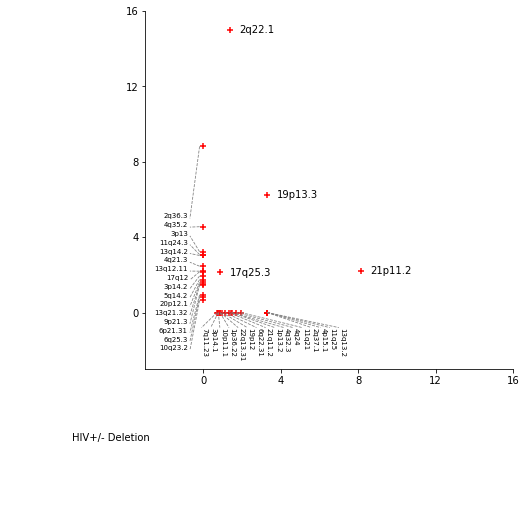

In [201]:
# Set up the axes with gridspec
fig = plt.figure(figsize=(9, 9))
grid = plt.GridSpec(2, 2, hspace=0.05, wspace=0.05, 
                    width_ratios=[1,3], 
                    height_ratios=[3,1])


ax1 = fig.add_subplot(grid[1])
# scatter points on the main axes
ax1.scatter(x, y, marker='+', s=26, c='red', alpha=1)

# adjust_spines(ax1, ['top', 'right'])
ax1.set_xlim(-3, maxq)
ax1.set_ylim(-3, maxq)


# Major ticks every 4, minor ticks every 5
major_ticks = np.arange(0, 17, 4)
# minor_ticks = np.arange(0, 101, 5)

ax1.set_xticks(major_ticks)
# ax.set_xticks(minor_ticks, minor=True)
ax1.set_yticks(major_ticks)
# ax.set_yticks(minor_ticks, minor=True)

# ax1.tick_params(direction='in', length=6, width=2, colors='black',
#                grid_color='black', grid_alpha=0.5, grid_linewidth=4 )
# ax1.set_xticklines(np.linspace(0,16,5))
# ax1.set_xticklabels(np.linspace(0,16,5))

ax1.spines['right'].set_visible(False) # turn off right spine
ax1.spines['top'].set_visible(False)



ax0 = fig.add_subplot(grid[0],  xticklabels=[], sharey=ax1, frameon=False)
remove_tickline_ticklables(ax0)




ax3 = fig.add_subplot(grid[3], yticklabels=[], sharex=ax1, frameon=False)



ax2 = fig.add_subplot(grid[2], frameon=False)
ax2.text(.5, .5,'HIV+/- Deletion')
remove_tickline_ticklables(ax2)




# histogram on the attached axes
# ax3.text(.2,.95, 'hiv-cytoband', rotation=-90, withdash=True, verticalalignment='top', fontsize=14)
xlxs, xlys = label_xband(xbands, ax1)
# ax3.invert_yaxis()
remove_tickline_ticklables(ax3)


# ax0.text(.95,.5, 'hiv+ cytoband', rotation=-0, withdash=True, horizontalalignment='right', fontsize=14)
ylxs, ylys = label_yband(ybands, ax1)

# connect points and labels
for px, py, lx, ly in zip(pyxs, pyys, ylxs, ylys):
    _ = ax1.plot((px-0.2, lx+0.1), (py, ly), linestyle='dashed', color='gray',linewidth=.8)

# ax0.invert_xaxis()

# connect points and labels
for px, py, lx, ly in zip(pxxs, pxys, xlxs, xlys):
    _ = ax1.plot((px, lx), (py, ly), linestyle='dashed', color='gray',linewidth=.8)

_ = plot_shared_bands(sbands, ax1)
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients_new/test.png'
# plt.savefig(of, bbox_inches='tight', dpi=400)

In [174]:
pys

1     8.818299
5     4.554022
2     3.224834
11    3.075628
13    3.026346
4     2.457760
12    2.192627
15    2.162273
3     1.941536
6     1.747705
18    1.601088
14    1.506751
9     1.480001
7     0.942714
8     0.850012
10    0.644434
Name: hiv+q(-log10), dtype: float64

(-0.5, 2879.5, 2878.5, -0.5)

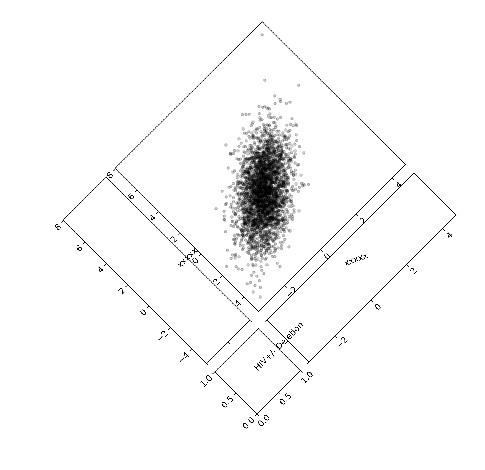

In [98]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.misc
from scipy import ndimage
import matplotlib.pyplot as plt

# img=mpimg.imread(of)
# img = scipy.misc.imread(of)
from PIL import Image
img = Image.open(of)
rotated_img = img.rotate(45, resample=Image.BICUBIC, expand=True)
#rotate image
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
# rotated_img = ndimage.rotate(img, 45)
plt.imshow(rotated_img)#, cmap=plt.cm.gray)
plt.axis('off')